In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from xgboost import XGBRegressor, DMatrix
import xgboost as xgb
import matplotlib.pyplot as plt
import keras
import albumentations as A
import numpy as np
import glob
import cv2
import os
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.metrics import make_scorer
import math
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import statistics
from tqdm.notebook import tqdm
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

important_features = ['X','Y','tile','Height',
                     '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD', '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_OPN_asc', '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0008_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0002_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0001_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0005_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0002_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0012_OPN', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_ERO_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0012_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0005_DIL_asc', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0006_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_OPN_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0007_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_GRD', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0004_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0012_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW2_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0009_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0003_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0007_GRD', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0011_GRD', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0004_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0012_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0008_GRD_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0001_CLS', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_BHT', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_CLS', '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0011_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0009_ERO_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0007_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0013_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO']



filepath = 'C:/Users/egnke/PythonCode/Met_Eireann_git/Ireland_building_heights/Modelling/DataSetCreation/Pixel-Wise-Data/building_height_data.csv'
data = pd.read_csv(filepath)
print(data.shape)
data = data[important_features]
# filter out zeros and the tallest building in Ireland which is 50 metres taller
data = data[data.Height > 0]
data.head()

(1067270, 77)


,X,Y,tile,Height,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_OPN_asc,2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_DIL_asc,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_GRD_asc,...,2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_GRD_asc,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_CLS_asc,2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_OPN_asc,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_GRD_asc,2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO
0,2135,2523,X0002_Y0002,2,4641,3704,430,2383,-12226,4471,...,1287,191,3231,355,-15865,2326,1304,-6344,5743,1652
1,2142,2546,X0002_Y0002,2,5813,3078,426,2362,-13566,6064,...,1045,30,9010,146,-16334,1976,1213,-6873,7643,1511
2,2139,2524,X0002_Y0002,2,2330,5947,430,1699,-12305,4422,...,1274,191,2823,472,-15789,2478,1296,-6710,5375,1749
3,2161,2556,X0002_Y0002,2,3957,4461,560,1780,-15564,2861,...,1363,118,3515,166,-16665,2385,1064,-6016,7107,1645
4,2139,2523,X0002_Y0002,2,2677,5947,430,2260,-12857,3870,...,1271,191,2871,348,-15906,2478,1309,-6730,5213,1760


In [12]:
def compute_class_weights(array, group_above_10m=True):
    
    if group_above_10m:
        array = np.where(array>10, 11, array)
        
    class_weights = class_weight.compute_class_weight('balanced',
                                                     np.unique(array),
                                                     array)

    class_weight_mapper = dict(zip(np.unique(array), class_weights))

    vectorized = np.vectorize(class_weight_mapper.get)(array)

    return vectorized


def weighted_root_mean_squared_error(y_actual, y_pred):
    weights = replace_value_with_frequency_of_occurance(y_actual)
    return np.sqrt(np.sum(weights * ((y_pred - y_actual) ** 2)) / np.sum(weights))


def root_mean_squared_error(y_actual, y_pred):
    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

bins     = np.arange(1,41)
bins[-1] = data.Height.max()
data['binned'] = pd.cut(data['Height'], bins)
data['stratified_labels'] = LabelEncoder().fit_transform(data['binned'])


y = data['Height']
stratified = data['stratified_labels']
X = data.drop(['X','Y','tile','Height','binned','stratified_labels'], axis=1)

params = {'max_depth': 6,
         'n_estimators':100,
         'learning_rate': 0.1,
         'gamma':'0.15000000000000002',
         'colsample_bytree':'0.45',
         'objective':'count:poisson'
         }



poisson_xgb  = XGBRegressor(**params)
linear_model = Ridge(alpha=0.01)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=stratified, 
                                                    test_size=0.3)

In [14]:
class_weights = compute_class_weights(y_train)


xgb = XGBRegressor(**params)
xgb.fit(X_train, y_train, sample_weight=class_weights)


linear_model = Ridge(alpha=0.005, normalize = True)
linear_model.fit(X_train, y_train, 
                 sample_weight=class_weights, 
                 )


Ridge(alpha=0.005, normalize=True)

In [16]:
def weighted_root_mean_squared_error(y_actual, y_pred):
    weights = replace_value_with_frequency_of_occurance(y_actual)
    return np.sqrt(np.sum(weights * ((y_pred - y_actual) ** 2)) / np.sum(weights))

def replace_value_with_frequency_of_occurance(array):

    unique_elements, counts_elements = np.unique(array, return_counts=True)
    mapping = dict(zip(unique_elements, counts_elements))
    
    return np.vectorize(mapping.get)(array)

def root_mean_squared_error(y_actual, y_pred):
    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE


linear_model_preds = linear_model.predict(X_test)
xgb_model_preds    = xgb.predict(X_test)

linear_WRMSE = weighted_root_mean_squared_error(y_test, linear_model_preds)
linear_RMSE  = root_mean_squared_error(y_test, linear_model_preds)
print(f'Linear Model RMSE: {round(linear_RMSE, 2)}, WRMSE: {round(linear_WRMSE, 2)}')

xgb_WRMSE = weighted_root_mean_squared_error(y_test, xgb_model_preds)
xgb_RMSE  = root_mean_squared_error(y_test, xgb_model_preds)
print(f'XGBoost Model RMSE: {round(xgb_RMSE, 2)}, WRMSE: {round(xgb_WRMSE, 2)}')

Linear Model RMSE: 3.04, WRMSE: 2.05
XGBoost Model RMSE: 2.71, WRMSE: 1.83


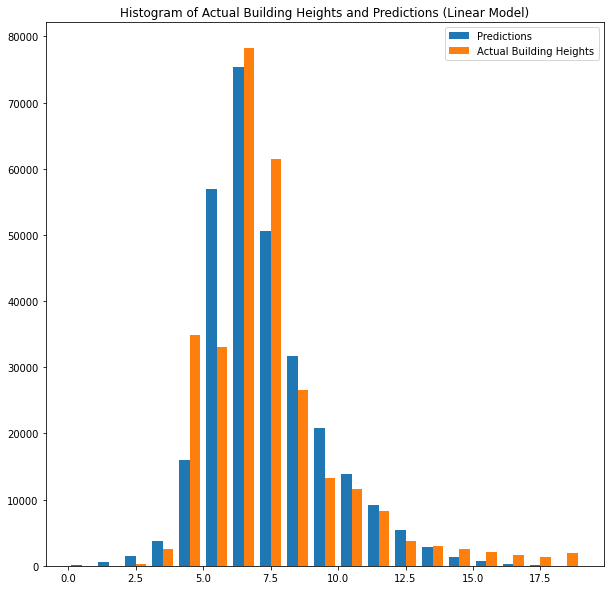

In [23]:
def plot_building_heights(preds, y_true, title):
    fig = plt.figure(figsize=(10, 10))
    plt.title(title)
    bins = np.arange(0,20)
    plt.hist([preds, y_true], bins, label=['Predictions', 'Actual Building Heights'])
    plt.legend(loc='upper right')
    
    
plot_building_heights(linear_model_preds, y_test, 'Histogram of Actual Building Heights and Predictions (Linear Model)')

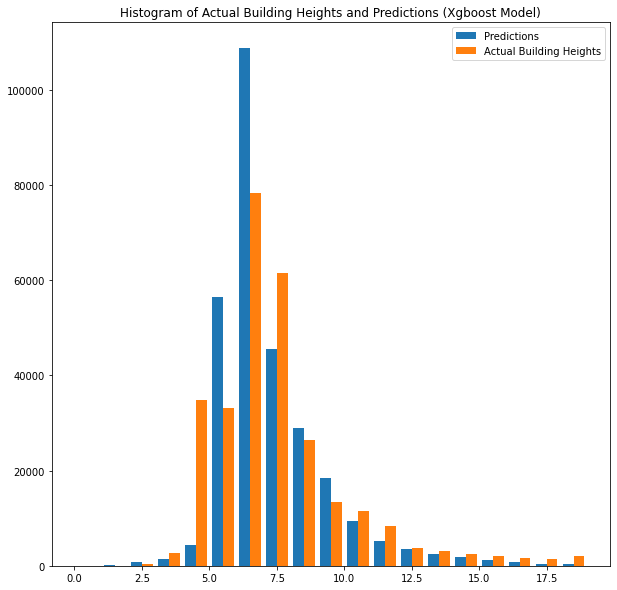

In [24]:
plot_building_heights(xgb_model_preds, y_test, 'Histogram of Actual Building Heights and Predictions (Xgboost Model)')

# Create Model

In [ ]:
import pickle

def load_model(pkl_filename):

    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
        
    return pickle_model


class_weights = compute_class_weights(y)

linear_model = Ridge(alpha=0.005, normalize = True)
linear_model.fit(X, y, 
                 sample_weight=class_weights, 
                 )


pkl_filename = "final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(linear_model, file)